Plotting in Python
==========

In [1]:
# First, load the relevant packages
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In older versions of the jupyter notebook, you would often find this line:
```
%matplotlib inline
```

This makes plots appear automatically beneath the cell that creates them. This is now the standard behaviour of jupyter notebook, so this line is no longer needed.

The drawback is that plot configurations no longer survive the cell, so you have to create the plot inside a single cell.

You can change this behaviour by using a different option, for example

```
%matplotlib tk
```

Just note that the plot will not appear until you run the `plt.show()` command.

In [2]:
# Next, we need something to plot
x = np.linspace(-2*np.pi, 2*np.pi, 1000, endpoint=True)
y = np.cos(x)
z = np.sin(3*x)

We can use the `plt` module directly to plot something:

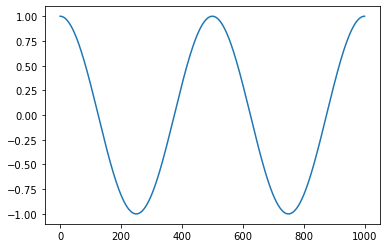

In [3]:
plt.plot(y)

You can see that the x-axis values are completely wrong. If we give the `plot` command two arrays (of the same length), then it interprets the first as the x- and the second as the y-coordinates of the plot:

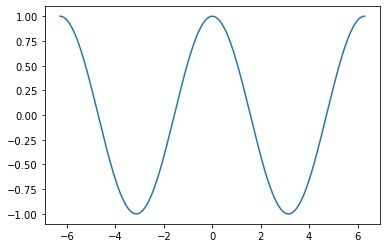

In [4]:
plt.plot(x, y)

There is no requirement of the two being of increasing values:

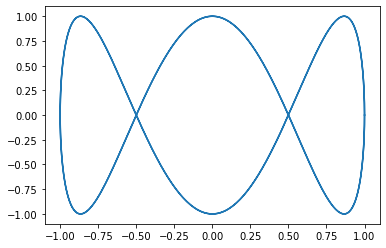

In [5]:
plt.plot(y, z)

## Figures and Axes

`plt` is the library that contains the plotting routines. The two main components of it are the **`figure`** and the **`axes`** (yes, that's a plural) objects.
The `figure` controls the overall layout. It can contain one or more `axes` objects that contain all the actual visible items.

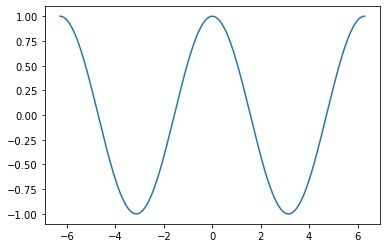

In [11]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot()
ax.plot(x, y)

You will generally create your plot incrementally, so let's go through the process.

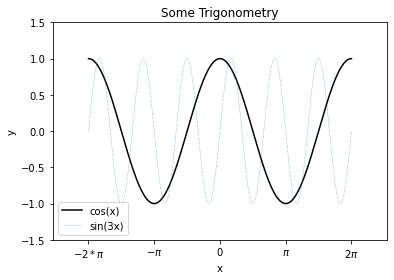

In [29]:
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xticks(
    [-2*np.pi, -np.pi, 0, np.pi, 2*np.pi]
)
ax.set_xticklabels(
    ["$-2*\pi$", "$-\pi$", "0", "$\pi$", "$2\pi$"]
)
ax.set_xlim(-8, 8)
ax.set_ylim(-1.5, 1.5)
ax.plot(x, y, '-', color='black', label='cos(x)')
ax.plot(x, z, ':', linewidth=0.5, label='sin(3x)')
ax.legend()
ax.set_title("Some Trigonometry")
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.savefig('trig.png')
plt.show()

As I said before, a `figure` can contain several `axes` objects.

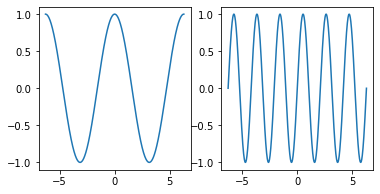

In [34]:
fig = plt.figure(figsize=(6, 3))
ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)
ax0.plot(x, y)
ax1.plot(x, z)

There's almost always more than one way to do something in matplotlib. For example, here's another way:

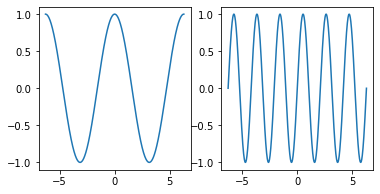

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
axes[0].plot(x, y)
axes[1].plot(x, z)

## Plotting 2D Data

Matplotlib has 4 main methods to plot 2D data:

- `imshow` -- fast and simple, mainly for regularly spaced data
- `pcolormesh` -- mainly for irregularly spaced data
- `contour` -- for contour plots
- `contourf` -- for filled contour plots

In [36]:
x = np.linspace(-2*np.pi, 2*np.pi, 1001, endpoint=True)
y = np.linspace(-np.pi, np.pi, 501, endpoint=True)
XX, YY = np.meshgrid(x, y)
V = np.sin(XX) * np.cos(YY)

## Real World Example

Plot surface air pressure and wind over Australia

In [53]:
ds = xr.open_dataset('hi-data.nc')

In [64]:
pressure = ds['air_pressure_at_sea_level'].sel(latitude=slice(-80, 80))

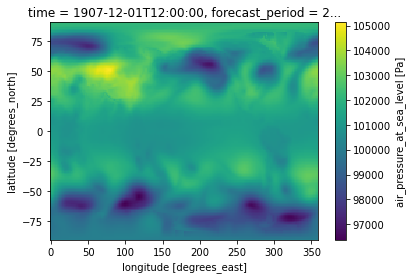

In [58]:
pressure.isel(time=0).plot()

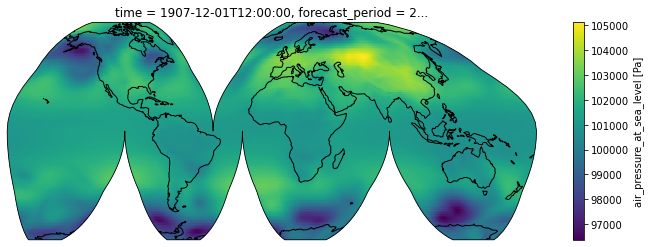

In [66]:
fig, ax = plt.subplots(
    figsize=(13, 4), 
    subplot_kw={
        'projection': ccrs.InterruptedGoodeHomolosine()
    }
)
ax.coastlines()
pressure.isel(time=0).plot(ax=ax, transform=ccrs.PlateCarree())

In [67]:
ds

<xarray.Dataset>
Dimensions:                    (bnds: 2, latitude: 145, latitude_0: 144, longitude: 192, longitude_0: 192, time: 31)
Coordinates:
  * time                       (time) datetime64[ns] 1907-12-01T12:00:00 ... ...
  * latitude                   (latitude) float32 -90.0 -88.75 ... 88.75 90.0
  * longitude                  (longitude) float32 0.0 1.875 ... 356.25 358.125
    forecast_period            (time) timedelta64[ns] 21152 days 12:00:00 ......
    forecast_reference_time    datetime64[ns] 1850-01-01
  * latitude_0                 (latitude_0) float32 -89.375 -88.125 ... 89.375
  * longitude_0                (longitude_0) float32 0.9375 2.8125 ... 359.0625
    height                     float64 10.0
Dimensions without coordinates: bnds
Data variables:
    air_pressure_at_sea_level  (time, latitude, longitude) float64 ...
    latitude_longitude         int32 -2147483647
    time_bnds                  (time, bnds) datetime64[ns] 1907-12-01 ... 190...
    forecast_period_bnds       (time, bnds) int64 507648 507672 ... 508392
    x_wind                     (time, latitude_0, longitude_0) float64 ...
    y_wind                     (time, latitude_0, longitude_0) float64 ...
Attributes:
    source:       Data from Met Office Unified Model
    um_version:   7.3
    Conventions:  CF-1.7

In [68]:
au_ds = ds.sel(
    time='1907-12-01',
    longitude=slice(110, 160),
    latitude=slice(-45, -8),
    longitude_0=slice(110, 160),
    latitude_0=slice(-45, -8)
)

In [69]:
au_pr = au_ds['air_pressure_at_sea_level'].isel(time=0)
au_xwind = au_ds['x_wind'].isel(time=0)
au_ywind = au_ds['y_wind'].isel(time=0)
x = au_ds['longitude_0']
y = au_ds['latitude_0']

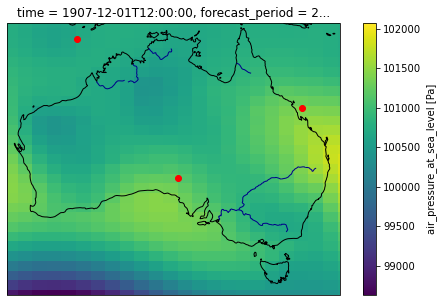

In [77]:
fig, ax = plt.subplots(figsize=(8, 5),
                      subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
ax.set_extent([112, 155, -43, -10])
au_pr.plot(ax=ax)
#ax.quiver(x, y, au_xwind, au_ywind, pivot='middle')
ax.scatter(loc_x, loc_y, transform=ccrs.PlateCarree(),
          color='red')
ax.add_feature(cfeature.RIVERS, edgecolor='darkblue')
plt.show()

In [75]:
loc_x = [134, 121, 150]
loc_y = [-30, -12, -21]

In [78]:
x = np.linspace(1e12, 1e13, 1000)
y = np.ones_like(x)

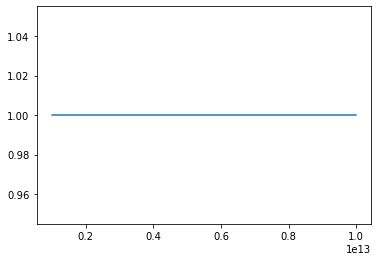

In [79]:
plt.plot(x, y)

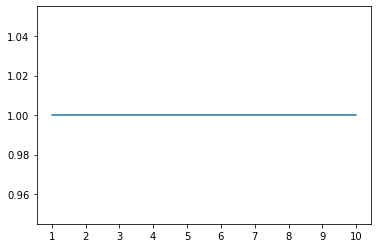

In [83]:
fig, ax = plt.subplots()
ax.set_xticks(np.linspace(1e12, 1e13, 10, endpoint=True))
ax.set_xticklabels(list(range(1, 11)))
ax.plot(x, y)